In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly


In [13]:
plt.style.use("default")
plt.rcParams.update({'font.size': 22})

# SI Figures

General notebook for plotting & saving SI figures (as .svg files in `SI_Figures/`)

## Compound & Patent Exponential fits

Figure 2

Cpd r2 = 3.30358593551192e-10
Patent r2 = 3.494880679464412e-10


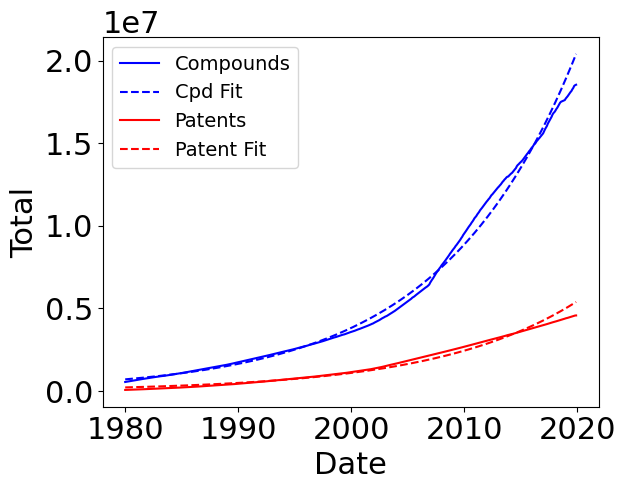

In [20]:
df = pd.read_csv("Data/NetworkStats/networkStats_byMonth.csv")
#Go through Dec 31 2019 to fit patent data
df = df[df["month"] < "2020-01"]

patent_df = pd.read_csv("Data/NetworkStats/patent_stats.csv")
patent_df = patent_df[patent_df["month"] >= "1980-01"]
patent_df = patent_df[patent_df["month"] < "2020-01"]

xs = np.arange(1980, 2020, 1/12)

#From https://stackoverflow.com/questions/58986593/np-poly1d-how-to-calculate-r2

### Compound fit
cpds = np.array(df["Cpd Nodes"])
fit, stats = poly.polyfit(xs, np.log(cpds), 1, w=np.sqrt(cpds), full=True)
#stats[0][0] is the SSR, r2 is SSR / SST
print("Cpd r2 =", stats[0][0] / sum(i*i for i in cpds))

plt.plot(xs, cpds, label="Compounds",  color="blue")
plt.plot(xs, np.exp(fit[0]) * np.exp(fit[1]*xs), label=f"Cpd Fit", color="blue", linestyle="--")


###Patent Fit
patents = np.array(patent_df["totalPatents"])
fit, stats = poly.polyfit(xs, np.log(patents), 1, w=np.sqrt(patents), full=True)
#stats[0][0] is the SSR, r2 is SSR / SST
print("Patent r2 =", stats[0][0] / sum(i*i for i in cpds))

plt.plot(xs, patents, label="Patents", color="red")
plt.plot(xs, np.exp(fit[0]) * np.exp(fit[1]*xs), label=f"Patent Fit", color="red", linestyle="--")

plt.xlabel("Date")
plt.ylabel("Total")
plt.legend(prop={"size":14})

In [ ]:
r